In [8]:
import pandas as pd
import plotly.express as px
import matplotlib as plt
from sqlalchemy import create_engine


user = 'postgres'
password ='admin123'
host = 'localhost'            # or use IP/domain
port = '5432'
database = 'test'
table_name = "agri_data_cleaned"      # name of the table to be created/replaced

# Create the connection string and engine
engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")
query = "SELECT * FROM agri_data_cleaned"
df = pd.read_sql(query, con=engine)




In [ ]:
# 1.Top 7 Rice Producing States (Bar Plot)
rice_states = df.groupby("state_name")["rice_production_1000_tons"].sum().nlargest(7).reset_index()
fig1 = px.bar(rice_states, x="state_name", y="rice_production_1000_tons", title="Top 7 Rice Producing States")
fig1.show()

In [6]:
# 2. Top 5 Wheat Producing States (Bar)
wheat_states = df.groupby("state_name")["wheat_production_1000_tons"].sum().nlargest(5).reset_index()
fig2 = px.bar(wheat_states, x="state_name", y="wheat_production_1000_tons", title="Top 5 Wheat Producing States")
fig2.show()

In [7]:
# 3. Wheat Production % (Pie)
fig3 = px.pie(wheat_states, values="wheat_production_1000_tons", names="state_name", title="Wheat Production Share")
fig3.show()

<Axes: title={'center': 'Top 5 States in Oilseed Production'}, xlabel='state_name'>

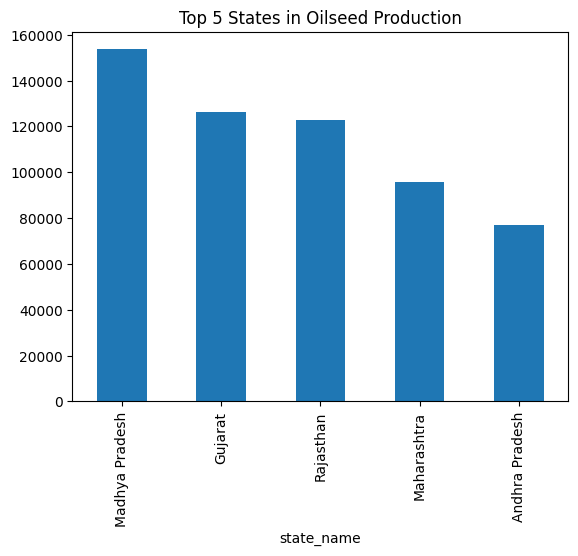

In [9]:
# 4.Top 5 Oilseed Producing States
top_oilseed = df.groupby("state_name")["oilseeds_production_1000_tons"].sum().nlargest(5)
top_oilseed.plot(kind="bar", title="Top 5 States in Oilseed Production")


In [10]:
# 5.Top 7 Sunflower Producing States (Bar Plot)
sunflower_states = df.groupby("state_name")["sunflower_production_1000_tons"].sum().nlargest(7).reset_index()
fig5 = px.bar(sunflower_states, x="state_name", y="sunflower_production_1000_tons", title="Top 7 Sunflower Producing States")
fig5.show()

In [11]:
# 6.India's Sugarcane Production Over Last 50 Years (Line Plot)
sugarcane_trend = df.groupby("year")["sugarcane_production_1000_tons"].sum().reset_index()
fig6 = px.line(sugarcane_trend, x="year", y="sugarcane_production_1000_tons", title="India's Sugarcane Production (Last 50 Years)")
fig6.show()

In [12]:
# 7.Rice vs. Wheat Production (Last 50 Years) – Line Chart
rice_wheat = df.groupby("year")[["rice_production_1000_tons", "wheat_production_1000_tons"]].sum().reset_index()
fig7 = px.line(rice_wheat, x="year", y=["rice_production_1000_tons", "wheat_production_1000_tons"], title="Rice vs Wheat Production Over 50 Years")
fig7.show()

In [13]:
# 8.Rice Production by Districts in West Bengal (Bar Plot)
wb_districts = df[df.state_name == "West Bengal"].groupby("dist_name")["rice_production_1000_tons"].sum().nlargest(10).reset_index()
fig8 = px.bar(wb_districts, x="dist_name", y="rice_production_1000_tons", title="Top Rice Producing Districts in West Bengal")
fig8.show()

In [14]:
# 9.Top 10 Wheat Production Years in Uttar Pradesh (Bar Chart)

up_wheat = df[df.state_name == "Uttar Pradesh"].groupby("year")["wheat_production_1000_tons"].sum().nlargest(10).reset_index()
fig9 = px.bar(up_wheat, x="year", y="wheat_production_1000_tons", title="Top 10 Wheat Production Years in UP")
fig9.show()

<Axes: title={'center': ' Pearl Millet vs Finger Millet Production Over 50 Years'}, xlabel='year'>

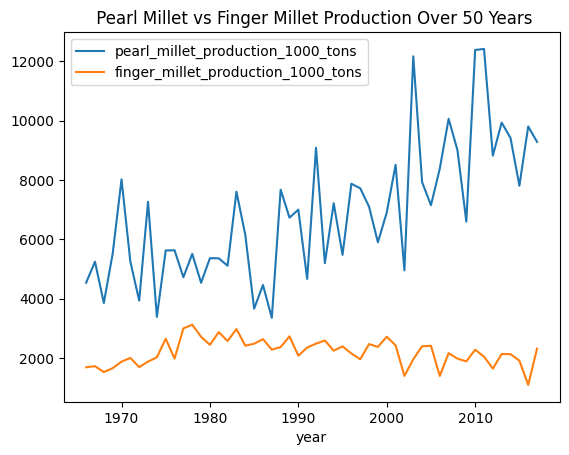

In [18]:
# 10. Millet Production Over the Last 50 Years (Line Plot)
df.groupby("year")[["pearl_millet_production_1000_tons", "finger_millet_production_1000_tons"]].sum().plot(
    kind="line",
    title=" Pearl Millet vs Finger Millet Production Over 50 Years"
)


In [13]:
yields = df.groupby("state_name")[["rice_yield_kg_per_ha", "wheat_yield_kg_per_ha"]].mean().reset_index()
fig12 = px.bar(yields, x="state_name", y=["rice_yield_kg_per_ha", "wheat_yield_kg_per_ha"], barmode="group",
               title="Rice vs Wheat Yield Across States")
fig12.show()